# $\color{green}{\text{Social Graphs Explainer Notebook}}$

#### $\color{green}{\text{First, some imports...}}$

In [1]:
import numpy as np
import random
import pandas as pd
import math
import string
import community
import os
from os.path import exists
import regex as re
import re
import requests
import urllib.request
import urllib.parse
import urllib.request as urllib2
import json
import unidecode
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
from fa2 import ForceAtlas2
import powerlaw
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from collections import Counter 
import pickle, io
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from community import community_louvain
from collections import defaultdict
from matplotlib.pyplot import errorbar
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
stopwords = STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ruthr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruthr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ruthr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## $\color{green}{\text{1. Motivation}}$

###  $\color{green}{\text{1.1  Dataset}}$
In this project the dataset includes several different kinds of characters from Greek mythology. The data was extracted from this [Fandom page](https://mythus.fandom.com/wiki/Category:Greek_mythology) which contains content of figures, gods, goddesses, creatures, heroes, and many more. 

The different figures, people, gods/goddesses, etc has their own node. Inbetween different characters, as for example the two gods Zeus and Hera, there exist a link from Hera's web page to Zeus' web page. 

Each character has their own text assigned to them. The texts contains everything from the family tree of that character to enemies and brave histories. 


###  $\color{green}{\text{1.2 Why this Dataset?}}$
Greek mythology is broadly known as an old, ancient and religious subject. After looking at different topics we understood there was more to the Greek gods and godesses than we first thougth which made us interested in learning more. All three of us knew of some Greek histories or characters from before but we did not know too much about the relations between them. What sentiments the characters and different communities have were also unkown but very compelling. Are the gods all angry, happy or just very romantic? 

Now, we proudly represent our notebook with interesting data analysis, sentiment analysis, text extrations, WordClouds, easy-to-read plots and more to show users of this page what Greek mythology is really all about. 


###  $\color{green}{\text{1.3 Goal for you as an user}}$
Greek mythology consists of tales and stories which are very dramatic and contain partnerships, intrigues and large family trees. The goal for this project is to give users a broader understanding on what greek mythology is about and what caracteristics it has. Maybe the next time you see the movies Hercules, Heracles in greek, or Troja you recognise the main topics of Greek mythology. 


## $\color{green}{\text{2. Basic Statistics}}$
### $\color{green}{\text{2.1 Data Cleaning and Processing}}$
- Firstly, the different web pages for the different characteres were examined. By looking at the Fandom API the different pages for the different characters were downloaded. After examining the different species in greek mythology it was decided to look into deities(gods), godesses, creatures, figures, heroes, peoples, personifictaions, cyclopes, mortals, stubs and titans. 
- Secondly, there were made a dataframe containing all the different characters with their title, what speicies they are, consorts, children, enemies and links. There is a total of 451 nodes with 2537 links. The characters that did not have any links to their site or links to other characters' sites were removed from the dataframe. These changes were done on the stubs category.
- By using the dataframe the text files for the characters were extracted and downloaded. Both the raw text(with titles, links, numbers etc) and later on the clean text were saved locally with file titles as the characters name. These text files makes up the network. If for example Zeus mentions his sister Hera, and Hera is referring to another site, there is added an edge between the two. Addiotionally, it was checked whether the link was in the dataframe. If the link was not in the dataframe it was discarded.
- After getting all the characters, their texts and their links the Giant Connected Component (GCC) was plotted. The characters, nodes, is given different colours to make it more visually pretty and there is added edges inbetween to see which characters has links to which. The `ForceAtlas2` algorithm was used when plotting the GCC to make positions of the nodes and links more understandable. 

Here follows a tutorial for how the data was extracted from the [Fandom Page](https://mythus.fandom.com/wiki/Category:Greek_mythology). 

In [2]:
print()
print ("GODS")
baseurl = "https://mythus.fandom.com/api.php?"
action = "action=query"
listt = "list=categorymembers"
dataformat = "format=json"
title = "cmtitle=Category:Greek_gods"
limit = "cmlimit=500"
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r_gods = requests.get(url, allow_redirects=True)
with open('gods.json', 'wb') as f:
    f.write(r_gods.content)
    f.close()

print()
print ("GODDESSES")
baseurl = "https://mythus.fandom.com/api.php?"
action = "action=query"
listt = "list=categorymembers"
dataformat = "format=json"
title = "cmtitle=Category:Greek_goddesses"
limit = "cmlimit=500"
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r_goddesses = requests.get(url, allow_redirects=True)
with open('goddesses.json', 'wb') as f:
    f.write(r_goddesses.content)
    f.close()    

print()
print ("CREATURES")
baseurl = "https://mythus.fandom.com/api.php?"
action = "action=query"
listt = "list=categorymembers"
dataformat = "format=json"
title = "cmtitle=Category:Greek_creatures"
limit = "cmlimit=500"
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('creatures.json', 'wb') as f:
    f.write(r.content)
    f.close()

print()
print ("FIGURES")
baseurl = "https://mythus.fandom.com/api.php?"
action = "action=query"
listt = "list=categorymembers"
dataformat = "format=json"
title = "cmtitle=Category:Greek_figures"
limit = "cmlimit=500"
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('figures.json', 'wb') as f:
    f.write(r.content)
    f.close()

print()
print ("HEROES")
baseurl = "https://mythus.fandom.com/api.php?"
action = "action=query"
listt = "list=categorymembers"
dataformat = "format=json"
title = "cmtitle=Category:Greek_heroes"
limit = "cmlimit=500"
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('heroes.json', 'wb') as f:
    f.write(r.content)
    f.close()
    
# ITEMS SKIPPED
# LOCATIONS SKIPPED

print()
print ("PEOPLES")
baseurl = "https://mythus.fandom.com/api.php?"
action = "action=query"
listt = "list=categorymembers"
dataformat = "format=json"
title = "cmtitle=Category:Peoples_in_Greek_mythology"
limit = "cmlimit=500"
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('peoples.json', 'wb') as f:
    f.write(r.content)
    f.close()
    
print()
print ("PERSONIFICATIONS")
baseurl = "https://mythus.fandom.com/api.php?"
action = "action=query"
listt = "list=categorymembers"
dataformat = "format=json"
title = "cmtitle=Category:Personifications_in_Greek_mythology"
limit = "cmlimit=500"
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('personifications.json', 'wb') as f:
    f.write(r.content)
    f.close()

print()
print ("CYCLOPES")
baseurl = "https://mythus.fandom.com/api.php?"
action = "action=query"
listt = "list=categorymembers"
dataformat = "format=json"
title = "cmtitle=Category:Cyclopes"
limit = "cmlimit=500"
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('cyclopes.json', 'wb') as f:
    f.write(r.content)
    f.close()
    
print()
print ("MORTALS")
baseurl = "https://mythus.fandom.com/api.php?"
action = "action=query"
listt = "list=categorymembers"
dataformat = "format=json"
title = "cmtitle=Category:Mortals_from_Greek_myths"
limit = "cmlimit=500"
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('mortals.json', 'wb') as f:
    f.write(r.content)
    f.close()

print()
print ("STUBS")
baseurl = "https://mythus.fandom.com/api.php?"
action = "action=query"
listt = "list=categorymembers"
dataformat = "format=json"
title = "cmtitle=Category:Stubs"
limit = "cmlimit=500"
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('stubs.json', 'wb') as f:
    f.write(r.content)
    f.close()
    
print()
print ("TITANS")
baseurl = "https://mythus.fandom.com/api.php?"
action = "action=query"
listt = "list=categorymembers"
dataformat = "format=json"
title = "cmtitle=Category:Titans"
limit = "cmlimit=500"
query = "%s%s&%s&%s&%s&%s" %(baseurl,action, listt, title, limit, dataformat)
print(query)
url = query
r = requests.get(url, allow_redirects=True)
with open('titans.json', 'wb') as f:
    f.write(r.content)
    f.close()


GODS
https://mythus.fandom.com/api.php?action=query&list=categorymembers&cmtitle=Category:Greek_gods&cmlimit=500&format=json

GODDESSES
https://mythus.fandom.com/api.php?action=query&list=categorymembers&cmtitle=Category:Greek_goddesses&cmlimit=500&format=json

CREATURES
https://mythus.fandom.com/api.php?action=query&list=categorymembers&cmtitle=Category:Greek_creatures&cmlimit=500&format=json

FIGURES
https://mythus.fandom.com/api.php?action=query&list=categorymembers&cmtitle=Category:Greek_figures&cmlimit=500&format=json

HEROES
https://mythus.fandom.com/api.php?action=query&list=categorymembers&cmtitle=Category:Greek_heroes&cmlimit=500&format=json

PEOPLES
https://mythus.fandom.com/api.php?action=query&list=categorymembers&cmtitle=Category:Peoples_in_Greek_mythology&cmlimit=500&format=json

PERSONIFICATIONS
https://mythus.fandom.com/api.php?action=query&list=categorymembers&cmtitle=Category:Personifications_in_Greek_mythology&cmlimit=500&format=json

CYCLOPES
https://mythus.fandom.

In [3]:
def js_r(filename: str):
    with open(filename) as f_in:
        return json.load(f_in)
    
filename = 'creatures.json'
d = js_r(filename)
creatures = d['query']['categorymembers']

filename = 'cyclopes.json'
d = js_r(filename)
cyclopes = d['query']['categorymembers']

filename = 'gods.json'
d = js_r(filename)
gods = d['query']['categorymembers']

filename = 'goddesses.json'
d = js_r(filename)
goddesses = d['query']['categorymembers']

filename = 'figures.json'
d = js_r(filename)
figures = d['query']['categorymembers']

filename = 'heroes.json'
d = js_r(filename)
heroes = d['query']['categorymembers']

filename = 'mortals.json'
d = js_r(filename)
mortals = d['query']['categorymembers']

filename = 'peoples.json'
d = js_r(filename)
peoples = d['query']['categorymembers']

filename = 'personifications.json'
d = js_r(filename)
personifications = d['query']['categorymembers']

filename = 'stubs.json'
d = js_r(filename)
stubs = d['query']['categorymembers']

filename = 'titans.json'
d = js_r(filename)
titans = d['query']['categorymembers']

In [12]:
path_exists = os.path.exists('./characters') #make a folder for the characters raw text
if path_exists == 0:
    os.mkdir('./characters')
print()
print("PANDAS DATAFRAME")
print()
import pandas as pd
characters = pd.DataFrame(columns=['Name', 'Category'])

for entry in creatures[1:]:
    characters = characters.append({'Name': entry['title'], 'Category': 'Creature'}, ignore_index=True)
for entry in cyclopes:
    characters = characters.append({'Name': entry['title'], 'Category': 'Cyclope'}, ignore_index=True)
for entry in gods:
    characters = characters.append({'Name': entry['title'], 'Category': 'God'}, ignore_index=True)
for entry in goddesses:
    characters = characters.append({'Name': entry['title'], 'Category': 'Goddess'}, ignore_index=True)
for entry in figures:
    characters = characters.append({'Name': entry['title'], 'Category': 'Figure'}, ignore_index=True)
for entry in heroes:
    characters = characters.append({'Name': entry['title'], 'Category': 'Heroe'}, ignore_index=True)
for entry in mortals:
    characters = characters.append({'Name': entry['title'], 'Category': 'Mortal'}, ignore_index=True)
for entry in peoples:
    characters = characters.append({'Name': entry['title'], 'Category': 'People'}, ignore_index=True)
for entry in personifications:
    characters = characters.append({'Name': entry['title'], 'Category': 'Personification'}, ignore_index=True)
for entry in stubs:
    characters = characters.append({'Name': entry['title'], 'Category': 'Stub'}, ignore_index=True)    
for entry in titans[1:]:
    characters = characters.append({'Name': entry['title'], 'Category': 'Titan'}, ignore_index=True)
characters['Name'] = characters['Name'].str.strip()
print("Initial length of the dataframe", len(characters))
characters = characters.drop(characters[characters.Name.str.contains("Category")].index).reset_index(drop = True)
characters.drop_duplicates(subset=['Name'], inplace = True, ignore_index = True, keep = 'last') #keep='first' by default
print("Without Category entries and duplicates: ", len(characters))


PANDAS DATAFRAME

Initial length of the dataframe 1145
Without Category entries and duplicates:  815


Importing and saving all characters' text in a file named after their title. 

In [13]:
baseurl = "https://mythus.fandom.com/api.php?"
rvslots = "rvslots=*"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat = "format=json"
path_root = "./characters/"

def api_to_txt(x):
    filename = x.Name
    titlename = urllib.parse.quote(filename)
    title = "titles=" + titlename.replace(" ", "_")
    query = "%s%s&%s&%s&%s&%s" %(baseurl, action, rvslots, title, content, dataformat)
    r = requests.get(query)
    response = r.text
    response = urllib2.urlopen(query).read()
    response_string = response.decode('utf-8').encode().decode('unicode-escape')
    path = path_root + filename + ".txt"
    is_character = re.findall(r'Greek', response_string)
    if (is_character):
        text_file = open(path, "wb")
        text_file.write(response)
        text_file.close()


a = characters.apply(lambda x: api_to_txt(x), axis=1)


In [113]:
#just preventing an error 
if os.path.exists('./characters/Myths and Folklore Wiki'):
    os.remove('./characters/Myths and Folklore Wiki')





In [15]:
import os.path

def remove_from_dataframe(filename):
    path = "./characters/" + filename + ".txt"
    if os.path.isfile(path):
        return 1
    else:
        
        return 0

characters = characters[characters['Name'].apply(remove_from_dataframe) != 0]
characters.reset_index(inplace = True, drop=True)
characters.is_copy = None #For the copy warning
characters

,Name,Category
0,Amphisbaena,Creature
1,Calydonian Boar,Creature
2,Campe,Creature
3,Catoblepas,Creature
4,Centaur,Creature
...,...,...
541,Tethys,Titan
542,Theia,Titan
543,Themis,Titan
544,Titanic Muses,Titan


Extracting information from the wiki namely species, siblings etc which are fields available in some of the wiki pages. 

In [16]:
def get_species(x):
    node_filename = x.Name
    with open('characters/' + node_filename + '.txt', 'r') as f:
        node_description = f.read()
    
    no_match = np.nan
            
    pattern_species = r'Species \= (.*?)\\n'
    species_block = redirect = re.findall(pattern_species, node_description)
    
    if not species_block:
        species_block = no_match
        species = species_block
        
    else:
        species_search = r'\[\[(.*?)\]\]'
        species = re.findall(species_search, species_block[0])
        species = [a.encode().decode('unicode-escape') for a in species]
        if not species:
            species = np.nan

    return species

characters["Species"] = characters.apply(lambda x: get_species(x), axis=1)



def get_siblings(x):
    node_filename = x.Name
    with open('characters/' + node_filename + '.txt', 'r') as f:
        node_description = f.read()
    
    no_match = np.nan
            
    pattern_siblings = r'Siblings \= (.*?)\\n'
    siblings_block = redirect = re.findall(pattern_siblings, node_description)
    
    if not siblings_block:
        siblings_block = no_match
        siblings = siblings_block
        
    else:
        siblings_search = r'\[\[(.*?)\]\]'
        siblings_list = re.findall(siblings_search, siblings_block[0])
        siblings = [a.encode().decode('unicode-escape') for a in siblings_list]
        if not siblings:
            siblings = np.nan

    return siblings
characters["Siblings"] = characters.apply(lambda x: get_siblings(x), axis=1)


def get_consorts(x):
    node_filename = x.Name

    with open('characters/' + node_filename + '.txt', 'r') as f:
        node_description = f.read()
    
    no_match = np.nan
            
    pattern_consorts = r'Consort \= (.*?)\\n'
    consorts_block = redirect = re.findall(pattern_consorts, node_description)
    
    if not consorts_block:
        consorts_block = no_match
        consorts = consorts_block
        
    else:
        consorts_search = r'\[\[(.*?)\]\]'
        consorts_list = re.findall(consorts_search, consorts_block[0])
        consorts = [re.sub(" *\\(.*", "", l) for l in consorts_list]
        consorts = [re.sub(" *\\|.*", "", l) for l in consorts]
        consorts = [a.encode().decode('unicode-escape') for a in consorts]
        if not consorts:
            consorts = np.nan

    return consorts

characters["Consorts"] = characters.apply(lambda x: get_consorts(x), axis=1)


def get_children(x):
    node_filename = x.Name
    with open('characters/' + node_filename + '.txt', 'r') as f:
        node_description = f.read()
    
    no_match = np.nan
            
    pattern_children = r'Children \= (.*?)\\n'
    children_block = redirect = re.findall(pattern_children, node_description)
    
    if not children_block:
        children_block = no_match
        children = children_block
        
    else:
        children_search = r'\[\[(.*?)\]\]'
        children_list = re.findall(children_search, children_block[0])
        children = [re.sub(" *\\(.*", "", l) for l in children_list]
        children = [re.sub(" *\\|.*", "", l) for l in children]
        children = [a.encode().decode('unicode-escape') for a in children]
        if not children:
            children = np.nan

    return children

characters["Children"] = characters.apply(lambda x: get_children(x), axis=1)


def get_enemies(x):
    node_filename = x.Name
    with open('characters/' + node_filename + '.txt', 'r') as f:
        node_description = f.read()
    
    no_match = np.nan
            
    pattern_enemies = r'Enemies \= (.*?)\\n'
    enemies_block = redirect = re.findall(pattern_enemies, node_description)
    
    if not enemies_block:
        enemies_block = no_match
        enemies = enemies_block
        
    else:
        enemies_search = r'\[\[(.*?)\]\]'
        enemies_list = re.findall(enemies_search, enemies_block[0])
        enemies = [re.sub(" *\\(.*", "", l) for l in enemies_list]
        enemies = [re.sub(" *\\|.*", "", l) for l in enemies]
        enemies = [a.encode().decode('unicode-escape') for a in enemies]
        if not enemies:
            enemies = np.nan

    return enemies

characters["Enemies"] = characters.apply(lambda x: get_enemies(x), axis=1)

at_least = characters.iloc[characters[['Species', 'Siblings', 'Consorts', 'Children']].dropna(thresh=1).index]

display(at_least)

,Name,Category,Species,Siblings,Consorts,Children,Enemies
2,Campe,Creature,[Dracæna],NaN,NaN,NaN,NaN
5,Cerberus,Creature,[Hellhound],NaN,NaN,NaN,NaN
25,Pegasus,Creature,[Demigod],NaN,NaN,NaN,NaN
33,Talos,Creature,"[Giant, Automaton, God]",NaN,NaN,[Hephaestus],NaN
35,Polyphemus,Cyclope,[Kúklōps|Cyclops],NaN,NaN,NaN,[Odysseus]
...,...,...,...,...,...,...,...
537,Rhea,Titan,[Titan|Titaness],NaN,[Cronus],"[Chiron, Demeter, Hades, Hera, Hestia, Poseido...",NaN
538,Selene,Titan,NaN,"[Helios, Eos]",[Endymion],NaN,NaN
541,Tethys,Titan,NaN,"[Titans, Hecatonchires, Cyclops|Cyclopes]",[Oceanus],[Potamoi],NaN
543,Themis,Titan,"[Horae, Fates, Ouranós, Gaia, Crius, Cronus, C...","[Crius, Cronus, Coeus, Hyperion, Iapetus, Ocea...",NaN,"[Horae, Fates, Ouranós, Gaia, Crius, Cronus, C...",NaN


The dataset represents the characters that have at least one of those fields that were just calculated. However, it is clear that this information is not useful beacause the size(107) of the dataframe not large enough, so we just stick to the original dataframe.

In [18]:
def get_links_characters(node_filename, links_list):
    links_list = list(set(links_list))
    characters_links_list = []
    for i in range(len(links_list)):
        if links_list[i] in characters.Name.values:
            if not links_list[i] == node_filename:
                characters_links_list.append(links_list[i])
    return characters_links_list

def get_links(node_filename):
    with open('characters/' + node_filename + '.txt', 'r') as f:
        node_description = f.read()

    pattern = r'\[\[(.*?)\]\]'

    find = re.findall(pattern, node_description)
    all_links_list = find
    characters_links_list = get_links_characters(node_filename, all_links_list)
#     characters_links_list = all_links_list
    return characters_links_list

characters["Linked"] = characters.apply(lambda x: get_links(x.Name), axis=1)
characters.head(3)

,Name,Category,Species,Siblings,Consorts,Children,Enemies,Linked
0,Amphisbaena,Creature,NaN,NaN,NaN,NaN,NaN,[]
1,Calydonian Boar,Creature,NaN,NaN,NaN,NaN,NaN,"[Artemis, Atalanta]"
2,Campe,Creature,[Dracæna],NaN,NaN,NaN,NaN,"[Nymph, Cronus, Echidna, Typhon]"


Finding number of nodes and links, and deleting the isolated nodes

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import re

def add_node_and_edges(net, node):
    net.add_node(node.Name, Category = node.Category, Species = node.Species)
    links = node.Linked
    if links: 
        for link in links:
            net.add_edge(node.Name, link)

import networkx as nx
import matplotlib.pyplot as plt

net = nx.DiGraph()
characters.apply(lambda x: add_node_and_edges(net, x), axis=1)
print("Number of isolated nodes (degree zero): ", len(list(nx.isolates(net)))) 

net.remove_nodes_from(list(nx.isolates(net)))


print("Number of nodes: ", len(net.nodes()))
print("Number of links: ", len(net.edges()))

Number of isolated nodes (degree zero):  23
Number of nodes:  523
Number of links:  3708


### $\color{green}{\text{2.2 Network visualization}}$
- A visualisation of the greek mythology dataset (sampled):



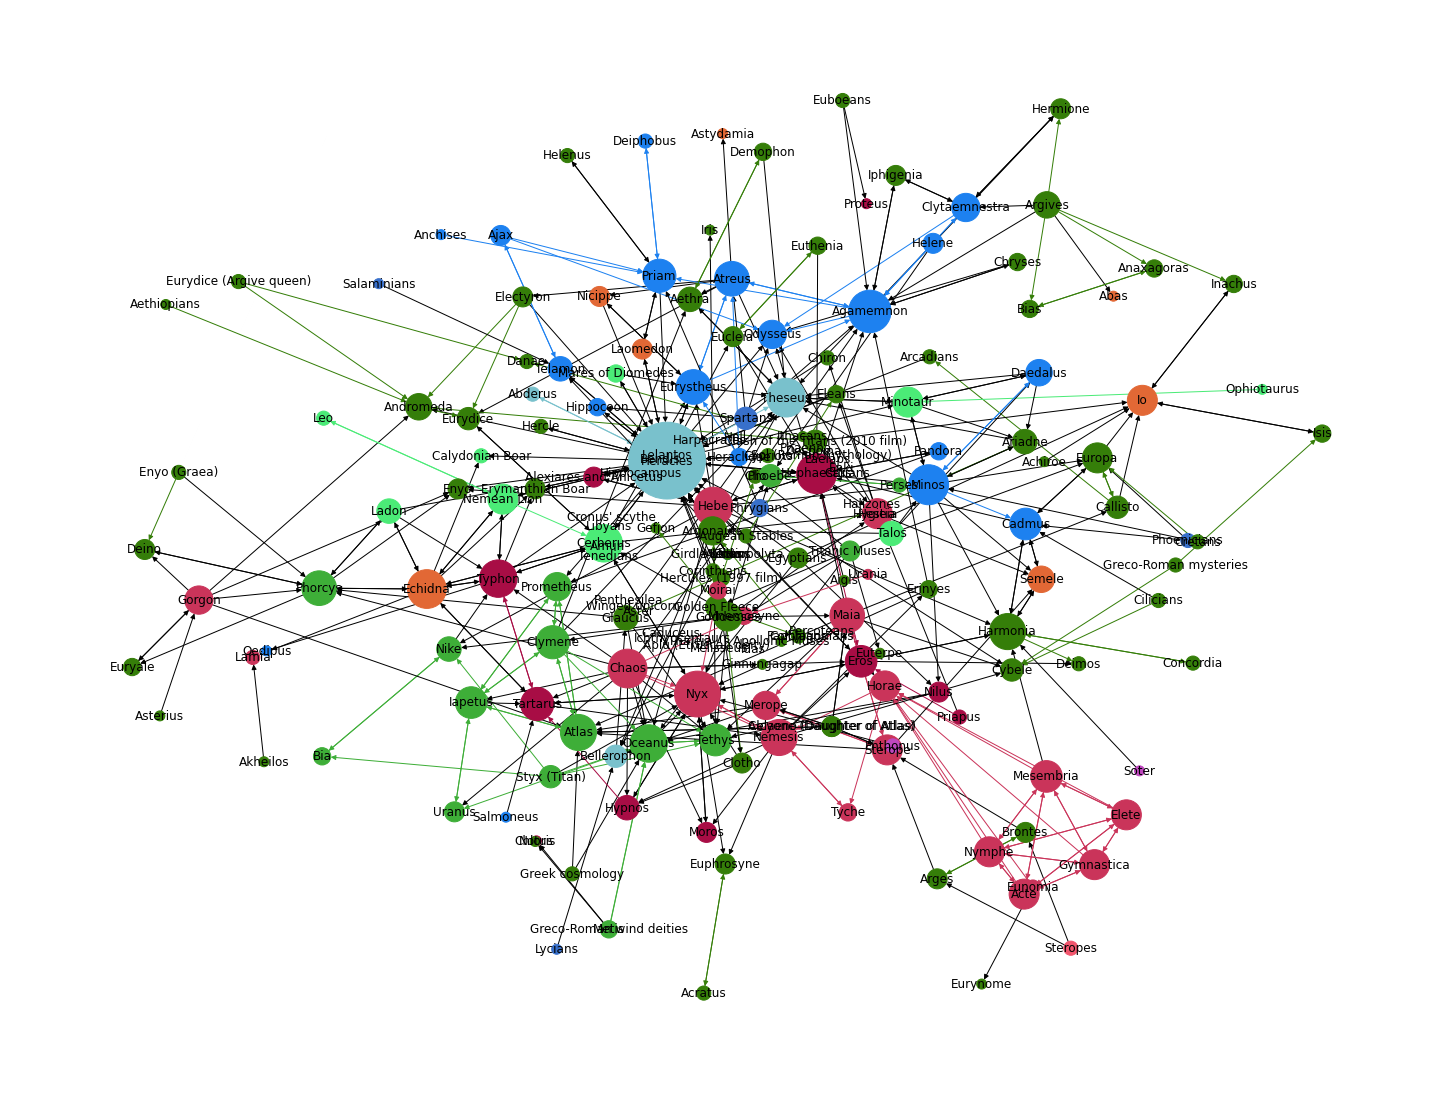

In [27]:
k = 200
sampled_nodes = random.sample(net.nodes, k)
sampled_graph = net.subgraph(sampled_nodes)

def random_color():
    r = lambda: random.randint(0,255)
    return('#%02X%02X%02X' % (r(),r(),r()))

categories = list(characters.Category.value_counts().keys())
colors = [random_color() for i in range(len(categories))]

node_color_zip = zip(categories, colors)
node_color_map = dict(node_color_zip)
node_colors =  [node_color_map[sampled_graph.nodes[node]['Category']] for node in sampled_graph]

d = dict(nx.degree(sampled_graph))

edge_color_map = node_color_map

def edge_color_get(G, edge): 
    if (G.nodes[edge[0]]['Category']) == (G.nodes[edge[1]]['Category']):
        
        return  edge_color_map[G.nodes[edge[0]]['Category']]
    else:
        return '#000000'
edge_colors = [edge_color_get(sampled_graph, edge) for edge in sampled_graph.edges()]

fig = plt.figure(figsize = [20,15])
nx.draw_kamada_kawai(sampled_graph, node_color = node_colors, edge_color = edge_colors, node_size=[v * 100 for v in d.values()], with_labels=True)

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 111.48it/s]


BarnesHut Approximation  took  0.28  seconds
Repulsion forces  took  1.41  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


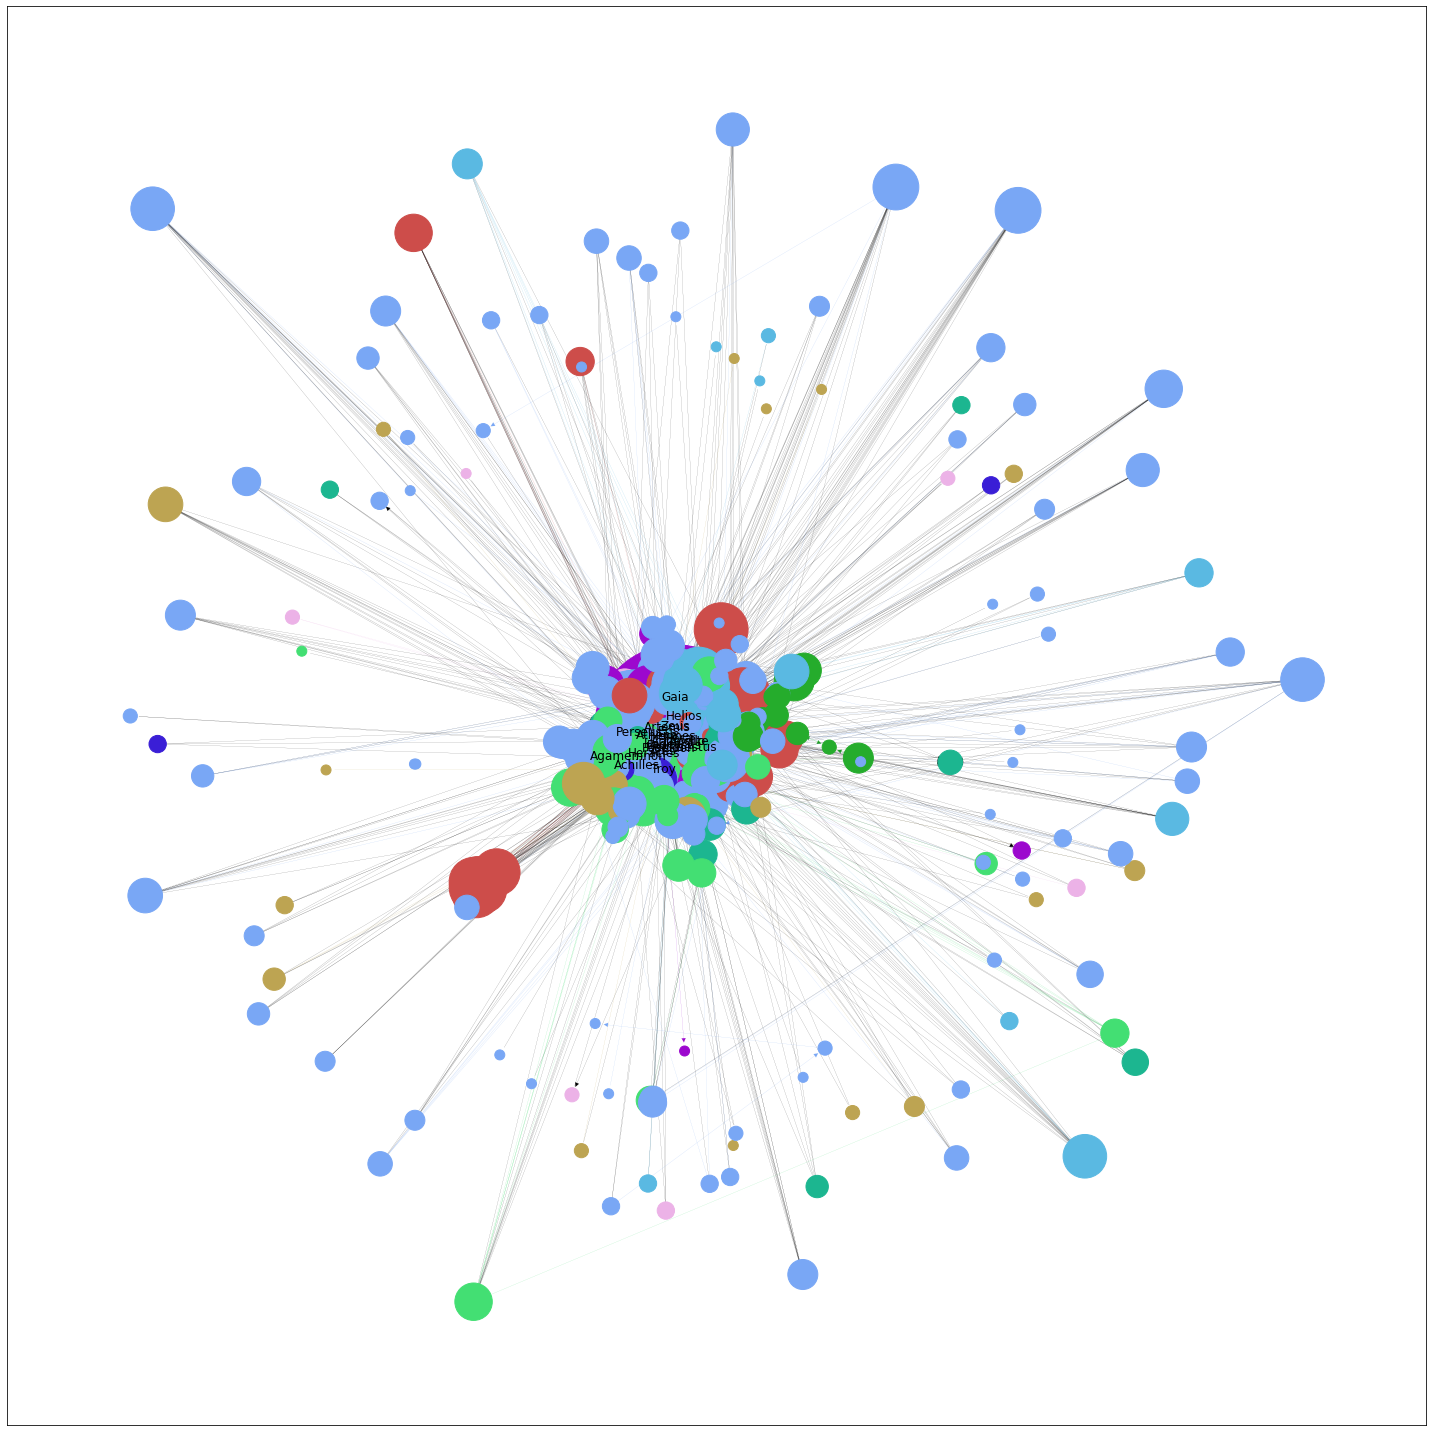

In [29]:
from fa2 import ForceAtlas2

sampled_graph = net #the drawn network is not sampled anymore
categories = list(characters.Category.value_counts().keys())
colors = [random_color() for i in range(len(categories))]

node_color_zip = zip(categories, colors)
node_color_map = dict(node_color_zip)
node_colors =  [node_color_map[sampled_graph.nodes[node]['Category']] for node in sampled_graph]

d = dict(nx.degree(sampled_graph))

edge_color_map = node_color_map

edge_colors = [edge_color_get(sampled_graph, edge) for edge in sampled_graph.edges()]

fig = plt.figure(figsize = [20,20])
fa = ForceAtlas2(outboundAttractionDistribution=False, gravity = 1,
    edgeWeightInfluence=1.5,scalingRatio=1)

positions = fa.forceatlas2_networkx_layout(sampled_graph, pos=None, iterations=200)

nx.draw_networkx_edges(sampled_graph, pos=positions, width = 0.1, edge_color = edge_colors)
nx.draw_networkx_nodes(sampled_graph, pos=positions, node_color = node_colors,  node_size=[v * 100 for v in d.values()])

highest_degree = dict(sorted(sampled_graph.degree, key=lambda x: x[1], reverse=True)[0:20])
labels_draw = list(highest_degree.keys())
labels = {}    
for node in sampled_graph.nodes():
    if node in labels_draw:
        labels[node] = node

nx.draw_networkx_labels(sampled_graph, pos=positions, font_size = 12, labels=labels)

# plt.axis('off')
plt.tight_layout()
plt.savefig('FA.png')
plt.show()
# plt.show()

### $\color{green}{\text{2.3 Basic stats}}$
In this part we'll go into basic statistics of the data set. Finding the top connected characters, calculating the degree distribution and powerlaw.

- In- and out-degrees.
    We decided to find the top 15 connected characters in regards to their in- and out-degrees. For both the in- and out degree Zeus is the top connected character. Which is not surprising since he is the biggest name in Greek Mythology. 

- Degree distribution
- Powerlaw

In [30]:
#The top connected character in greek mythology. i.e. find the node with the highest in-degree and out-degree
in_degree = sorted(net.in_degree, key=lambda x: x[1], reverse=True)
out_degree = sorted(net.out_degree, key=lambda x: x[1], reverse=True)

top15_in_degree = in_degree[:15]
top15_out_degree = out_degree[:15]

In [34]:
# In degree: Get lists of top 15 connected characters with their connection values
c_in_name = [None]*len(top15_in_degree)
c_in_value = [None]*len(top15_in_degree)
for i in range(len(top15_in_degree)):
    c_in_name[i] = top15_in_degree[i][0]
    c_in_value[i] = top15_in_degree[i][1]
# Out degree: Get lists of top 15 connected characters with their connection values
c_out_name = [None]*len(top15_out_degree)
c_out_value = [None]*len(top15_out_degree)
for i in range(len(top15_out_degree)):
    c_out_name[i] = top15_out_degree[i][0]
    c_out_value[i] = top15_out_degree[i][1]

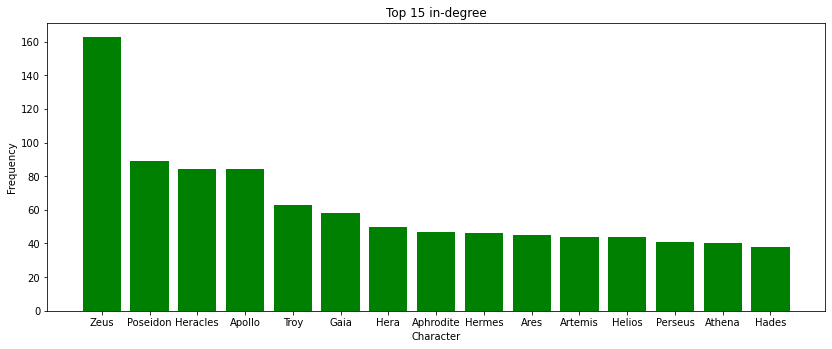

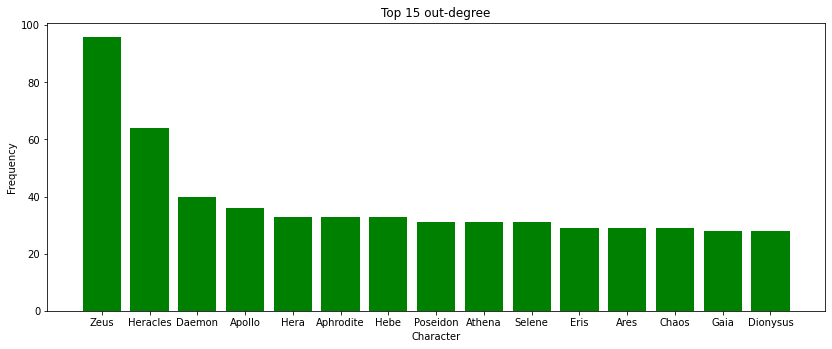

In [35]:
# Bar graph of top 15 in-degree
fig = plt.figure()
ax = fig.add_axes([0,0,1.8,1])
ax.set_title('Top 15 in-degree')
ax.set_xlabel('Character')
ax.set_ylabel('Frequency')
ax.bar(c_in_name,c_in_value,color='g')
plt.show()

# Bar graph of top 15 out-degree
fig = plt.figure()
ax = fig.add_axes([0,0,1.8,1])
ax.set_title('Top 15 out-degree')
ax.set_xlabel('Character')
ax.set_ylabel('Frequency')
ax.bar(c_out_name,c_out_value,color='g')
plt.show()

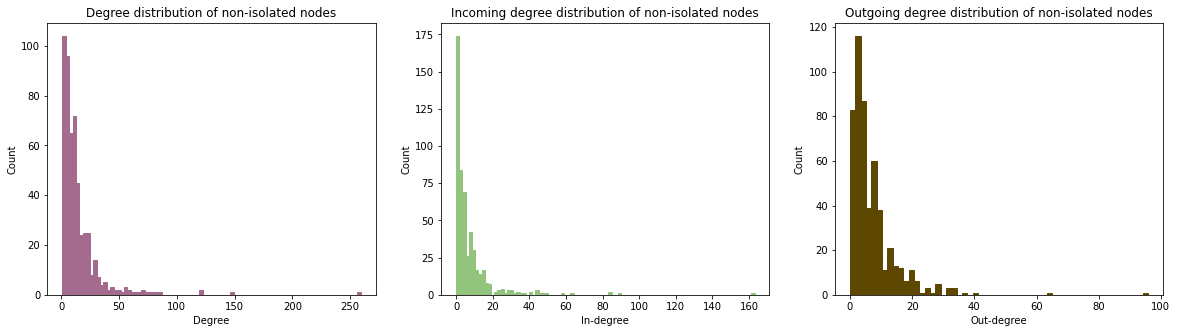

In [37]:
G_dir = net

fig, axs = plt.subplots(1,3)
fig.set_size_inches(20,5)

degrees = sorted(G_dir.degree(G_dir.nodes, weight=None), key=lambda x: x[1], reverse = True)
degrees_dist = [tuples[1] for tuples in degrees] #always >0 because we already removed the isolated nodes
hist_degree, bins =  np.histogram(degrees_dist, bins = 'auto')
bins_plot = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

axs[0].hist(degrees_dist, bins='auto', color='#a56b8e', edgecolor ='#a56b8e')
axs[0].set_title('Degree distribution of non-isolated nodes')
axs[0].set_xlabel('Degree')
axs[0].set_ylabel('Count')

in_degrees = sorted(G_dir.in_degree(G_dir.nodes, weight=None), key=lambda x: x[1], reverse = True)
in_degrees_dist = [tuples[1] for tuples in in_degrees]
hist_in_degree, bins =  np.histogram(in_degrees_dist, bins = 'auto')
bins_plot_in = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

axs[1].hist(in_degrees_dist, bins='auto', color='#93c47d', edgecolor ='#93c47d')
axs[1].set_title('Incoming degree distribution of non-isolated nodes')
axs[1].set_xlabel('In-degree')
axs[1].set_ylabel('Count')

out_degrees = sorted(G_dir.out_degree(G_dir.nodes, weight=None), key=lambda x: x[1], reverse = True)
out_degrees_dist = [tuples[1] for tuples in out_degrees]
hist_out_degree, bins =  np.histogram(out_degrees_dist, bins = 'auto')
bins_plot_out = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

axs[2].hist(out_degrees_dist, bins='auto', color='#5e4700', edgecolor ='#5e4700')
axs[2].set_title('Outgoing degree distribution of non-isolated nodes')
axs[2].set_xlabel('Out-degree')
axs[2].set_ylabel('Count')

plt.savefig('dist.png')
plt.show()

* Inward degree distribution
    * This distribution follows a power-law-like pattern. There is a significant number of characters with none-to-small amount of inward links. This means that there are a few distinct characters pointed by many, and many much less relevant characters pointed by very few.  Similar to a videogame, but not as extreme, there is a character (or a set of characters, depending on where we set the degree limit) there are a few central nodes that interact with many at some point.
* Outward degree distribution
    * Unlike the inwards degree distribution, here the most common number of degrees is  "spread" among more values. It is closer to a Poisson distribution. 

Calculating best minimal value for power law fit
alpha:  2.5876082599612866
Calculating best minimal value for power law fit
alpha:  3.6472555201541823
Calculating best minimal value for power law fit
alpha:  2.8621764936588248


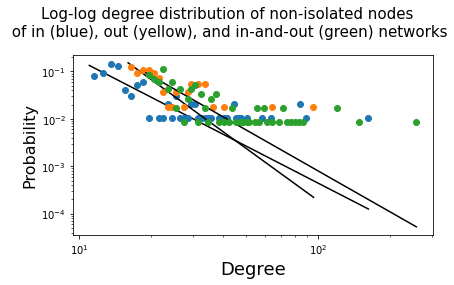

In [40]:
import powerlaw

def fit_plot_powerlaw(G, deg):
    if deg == "total":
        degrees = (list(dict(G.degree()).values()))
    elif deg == "in_degree":
        degrees = (list(dict(G.in_degree()).values()))
    else:
        degrees = (list(dict(G.out_degree()).values()))
        
    while 0 in degrees:
        degrees.remove(0)
    pfit = powerlaw.Fit(degrees, discrete=True)
    print("alpha: ", pfit.alpha)
    pfit.power_law.plot_pdf(color='k', label='Power law fit')
    pfit.plot_pdf(marker='o', linewidth=0, linear_bins=True)
from matplotlib import pyplot as plt    

fig = plt.figure()
fig.suptitle('Log-log degree distribution of non-isolated nodes\n of in (blue), out (yellow), and in-and-out (green) networks', fontsize=15)
plt.xlabel('Degree', fontsize=18)
plt.ylabel('Probability', fontsize=16)

fit_plot_powerlaw(G_dir, deg="in_degree")
fit_plot_powerlaw(G_dir, deg="out_degree")
fit_plot_powerlaw(G_dir, deg="total")
plt.tight_layout()
fig.savefig('powerlaw.jpg')

The powerlaw exponent $\gamma$ (alpha in our output), is $\gamma \approx 2.6$ for the in-degree network and $\gamma \approx 3.6$ for the out-degree. This means that they are in the scale-free and random network regimes, respectively. 

## $\color{green}{\text{3. Tools, theory and analysis}}$
###  $\color{green}{\text{3.1 Working with the text}}$
- To work with the characters text from the Fandom site it was necessary to use regular expressions to substract unnessecary words. Regex was also used to find links between characters, family relations and special part of the text. 
- Language processing as removing stopwords(yes, no, it, is, etc) was done by importing stopwords from the wordcloud package
- To ensure that the next part of the code runs succeedingly the user must make the files as follows: god, figure, creature, titan, people, mortal. In these files there will be saved a belonging text to that species type

###  $\color{green}{\text{3.2 Understanding the Dataset}}$
The data analysis strategies in this project is to look at the WordClouds for different species, find the communities of the network and the sentiments belonging to the different communities. 
- WordClouds on different species
    - What characterise the different species?
    - What are the most repeated words and how can that relate to that species?
- Communities
    - What communities are made? And do they correspond to the species?
- Sentiment analysis
    - What are the sentiments of the different communities?
    - Are the sentiments reasonable according to the different species?

###  $\color{green}{\text{3.3 Word Clouds}}$
Word Clouds are a very fun way to get to know your dataset better. For our word clouds we desided to only create them for the six biggest categories. Those are:
- Gods
- Goddesses
- Creatures
- Peoples
- Mortals
- Titans

Word clouds are a visualization that highlights the frequency of words within a text, in our case, words within categories. The word cloud picks out the most used words and ranks them by size in an image. 


Patterns to remove stopwords, special signs and other

In [43]:
removes_n = r"\\n"
removes_intro = "\"(.*?)\"\:"
removes_categories = r"\[\[category:\w.*\}"
removes_signs = "[^\w\s]"
removes_numbers = "\d"
removes_titles =r"\\n\|\w(.*?)\="
removes_trivials = r"\\n\\n\=\=\w(.*?)\=\=\\n"
removes_links = "(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)"
removes_latin = r"latin\=\w(.*?)\\n"
removes_s = "\ss\s"
removes_ufs = r"\\u(?<=u)\d..."
removes_center_align = r'align=\\"center\\"'


In [45]:
# Iterate over all files in the character folder to clean their text and save the cleaned characters text in a new folder character_clean
filenames = []
path_exists = os.path.exists('./characters_clean')
if path_exists == 0:
    os.mkdir('./characters_clean')
for file in os.listdir("./characters/"):
    filename = os.fsdecode(file)
    if filename.endswith( ('.txt') ): # only txt files
        filenames.append(filename)
filenames.sort() # filenames

In [114]:
removable_words = ['jpg', 'wikipedia', 'infobox', 'download', 'gallery','latin', 'figure', 'mortals','references', 'ref','greek'] #words that's not nessecary for the wordclouds
save_path = './characters_clean/'
for file in os.listdir("./characters/"):
    if file != '.ipynb_checkpoints' and file != 'Myths and Folklore Wiki':
        with open ("./characters/" + file) as f:
            lines = f.readlines()
            lines = ''.join(lines)
            lines = lines.lower()
            lines = re.sub(removes_center_align, '', lines)
            lines = re.sub(removes_ufs, '', lines)
            lines = re.sub(removes_categories, '', lines)
            lines = re.sub(removes_titles, '', lines)
            lines = re.sub(removes_trivials, '', lines)
            lines = re.sub(removes_links, '', lines)
            lines = re.sub(removes_latin, '', lines)
            lines = re.sub(removes_intro, '', lines)
            lines = re.sub(removes_n, '', lines)
            lines = re.sub(removes_numbers, '', lines)
            lines = re.sub(removes_signs, ' ', lines)
            for word in removable_words:
                lines = re.sub(word, '', lines)
            lines = re.sub(removes_s, '', lines)
            path = save_path + file
            text_file = open(path, "w") #save the files in an other folder - characters_clean
            text_file.write(lines)
            text_file.close()

Make a file "wordclouds" to store all the texts from the different species

In [115]:
path_exists = os.path.exists('./wordclouds')
if path_exists == 0:
    os.mkdir('./wordclouds')
path_wc = "./wordclouds/"

In [116]:
print("Text file for Gods")
Gods = characters['Category'] == 'God'
Gods = characters[Gods]
Name_gods = Gods['Name']
#Gods
Name_gods
lines_gods = []
for files in os.listdir("./characters_clean/"):
    for names in Name_gods:
        if names + '.txt' == files:
            with open ("./characters_clean/" + files) as f:
                lines_gods.append(f.readlines())

lines_gods = ''.join(str(elem) for elem in lines_gods)
lines_gods = re.sub(removes_signs, '', lines_gods)
for god in list(Name_gods):
    lines_gods = re.sub(god.lower(),'',lines_gods)
lines_gods = re.sub('god','', lines_gods)
path = path_wc +"gods_text.txt"
text_file = open(path, "w") 
text_file.write(lines_gods)
text_file.close()

Text file for Gods


In [117]:
print("Text file for Goddess")
Goddess = characters['Category'] == 'Goddess'
Goddess = characters[Goddess]
Name_goddess = Goddess['Name']
#Goddess
Name_goddess
lines_goddess = []
for files in os.listdir("./characters_clean/"):
    for names in Name_goddess:
        if names + '.txt' == files:
            with open ("./characters_clean/" + files) as f:
                lines_goddess.append(f.readlines())

lines_goddess = ''.join(str(elem) for elem in lines_goddess)
lines_goddess = re.sub(removes_signs, '', lines_goddess)
for goddess in list(Name_goddess):
    lines_goddess = re.sub(goddess.lower(),'',lines_goddess)
lines_goddess=re.sub('goddess','', lines_goddess)
path = path_wc +"goddess_text.txt"
text_file = open(path, "w") 
text_file.write(lines_goddess)
text_file.close()

Text file for Goddess


In [118]:
print("Text file for Creatures")
Creatures = characters['Category'] == 'Creature'
Creatures = characters[Creatures]
Name_creature = Creatures['Name']
lines_creatures = []
for files in os.listdir("./characters_clean/"):
    for names in Name_creature:
        if names + '.txt' == files:
            with open ("./characters_clean/" + files) as f:
                lines_creatures.append(f.readlines())

lines_creatures = ''.join(str(elem) for elem in lines_creatures)
lines_creatures = re.sub(removes_signs, '', lines_creatures)
for creature in list(Name_creature):
    lines_creatures = re.sub(creature.lower(),'',lines_creatures)
lines_creatures = re.sub('creature','', lines_creatures)
path = path_wc +"creatures_text.txt"
text_file = open(path, "w") 
text_file.write(lines_creatures)
text_file.close()


Text file for Creatures


In [119]:
print("Text file for People")
People = characters['Category'] == 'People'
People = characters[People]
Name_people = People['Name']
lines_people = []
for files in os.listdir("./characters_clean/"):
    for names in Name_people:
        if names + '.txt' == files:
            with open ("./characters_clean/" + files) as f:
                lines_people.append(f.readlines())

lines_people = ''.join(str(elem) for elem in lines_people)
lines_people = re.sub(removes_signs, '', lines_people)
for people in list(Name_people):
    lines_people = re.sub(people.lower(),'',lines_people)
lines_people = re.sub('people','', lines_people)
path = path_wc +"people_text.txt"
text_file = open(path, "w") 
text_file.write(lines_people)
text_file.close()


Text file for People


In [120]:
print("Text file for Mortal")
Mortal = characters['Category'] == 'Mortal'
Mortal = characters[Mortal]
Name_mortal = Mortal['Name']

path_mortal = "./mortal/"
lines_mortal = []
for files in os.listdir("./characters_clean/"):
    for names in Name_mortal:
        if names + '.txt' == files:
            with open ("./characters_clean/" + files) as f:
                lines_mortal.append(f.readlines())

lines_mortal = ''.join(str(elem) for elem in lines_mortal)
lines_mortal = re.sub(removes_signs, '', lines_mortal)
for mortal in list(Name_mortal):
    lines_mortal = re.sub(mortal.lower(),'',lines_mortal)
lines_mortal = re.sub('mortal', '', lines_mortal)
path = path_wc +"mortal_text.txt"
text_file = open(path, "w") 
text_file.write(lines_mortal)
text_file.close()


Text file for Mortal


In [121]:
print("Text file for Titans")
Titan = characters['Category'] == 'Titan'
Titan = characters[Titan]
Name_titan = Titan['Name']
lines_titan = []
for files in os.listdir("./characters_clean/"):
    for names in Name_titan:
        if names + '.txt' == files:
            with open ("./characters_clean/" + files) as f:
                lines_titan.append(f.readlines())

lines_titan = ''.join(str(elem) for elem in lines_titan)
lines_titan = re.sub(removes_signs, '', lines_titan)
for titan in list(Name_titan):
    lines_titan = re.sub(titan.lower(),'',lines_titan)
lines_titan = re.sub('titan','', lines_titan)
path = path_wc +"titan_text.txt"
text_file = open(path, "w") 
text_file.write(lines_titan)
text_file.close()



Text file for Titans


Plotting the six different Word Clouds for gods,goddesses people, creatures, mortals and titans


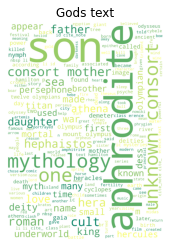

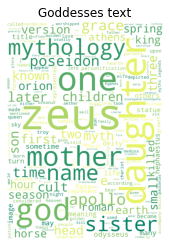

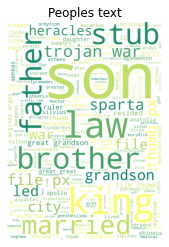

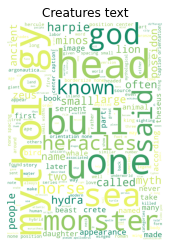

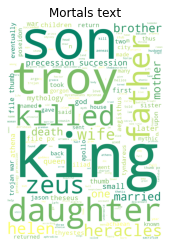

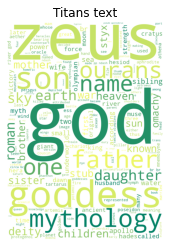

In [122]:
print("Plotting the six different Word Clouds for gods,goddesses people, creatures, mortals and titans")
wc = WordCloud(
    background_color = 'white',
    colormap='summer',
    stopwords = stopwords,
    height = 1400,
    width = 1000
)
all_lines = [lines_gods, lines_goddess,lines_people,lines_creatures,lines_mortal, lines_titan]
titles = ["Gods text", "Goddesses text","Peoples text", "Creatures text", "Mortals text", "Titans text"]
for alle in all_lines:
    if alle == lines_gods:
        alle = re.sub(removes_s,'', alle)
        generate_img = wc.generate(alle)
        plt.imshow(generate_img)
        plt.title(titles[0])
        plt.axis("off")
        plt.savefig('gods_wc.png')
        plt.show()
    if alle == lines_goddess:
        alle = re.sub(removes_s,'', alle)
        generate_img = wc.generate(alle)
        plt.imshow(generate_img)
        plt.title(titles[1])
        plt.axis("off")
        plt.savefig('goddess_wc.png')
        plt.show()
    if alle == lines_people:
        alle = re.sub(removes_s,'', alle)
        generate_img = wc.generate(alle)
        plt.imshow(generate_img)
        plt.title(titles[2])
        plt.axis("off")
        plt.savefig('people_wc.png')
        plt.show()
    if alle == lines_creatures:
        alle = re.sub(removes_s,'', alle)
        generate_img = wc.generate(alle)
        plt.imshow(generate_img)
        plt.title(titles[3])
        plt.axis("off")
        plt.savefig('creatures_wc.png')
        plt.show()
    if alle == lines_mortal:
        alle = re.sub(removes_s,'', alle)
        generate_img = wc.generate(alle)
        plt.imshow(generate_img)
        plt.title(titles[4])
        plt.axis("off")
        plt.savefig('mortal_wc.png')
        plt.show()
    if alle == lines_titan:
        alle = re.sub(removes_s,'', alle)
        generate_img = wc.generate(alle)
        plt.imshow(generate_img)
        plt.title(titles[5])
        plt.axis("off")
        plt.savefig('titan_wc.png')
        plt.show()

It was decided to remove all the gods names in the gods text, the goddesses names in the goddess text files, the creatures names in the creatures text and so on for all the text. Additionally, the words that describe the different species was substracted from that species' text. Otherwise, god and zeus would be the most mentioned words for gods and goddess for goddesses and creature for creatures etc. 

The six different WordClouds provides a good overview of what the gods,goddesses, people, creatures, mortals and titans have in their text files. 
- The gods clearly have one word in common - son. 
- The goddesses wordcloud has words as daughter and Zeus as the most mentioned ones. In greek mythology Zeus is one the main gods and is said to have a lot of lovers which probably are goddesses. 
- The people text have many familiar expressions as son, family and father. This gives an indication that the peoples text includes many family relations. - The creatures text includes words as horse, bull, monser, centaur and sphinx which is not surprising since the text most likely describe what kind of species the creatuers are.  
-In the WordCloud for the mortals three words stand out - son, king and troy. The Trojan war is a big event in the greek mythology which reflects the texts of the mortals. 
- Zeus, goddess, god and son are the most repeated words for the titans.  

###  $\color{green}{\text{3.4 Community detection}}$
We are interested in detecting communities in our network and the way we chose to do that is applying the Louvain algorithm. The algorithm finds the partition in a network and with that maximizes modularity. Modularity measures the difference between the density of the local link in subgraphs that is given by the partition and the density of the expected link in a randomly wired network. Modularity calculations gives us a value between -1 and 1. The higher the absolute value of modularity, the better the partition. So if it detects none good partition the modularity would result in 0. 

We will apply this algorithm to our undirected GCC network.

In [123]:
#Define an undirected network from our directed GCC. 
G_undir = G_dir.to_undirected()

In [124]:
#computing the partition given the highest modularity. 
partition = community.best_partition(G_undir, randomize = False)
communities = list(set(partition.values()))

no_of_communities = len(communities)
no_of_communities

12

We find with this partition that there are 12 communities in total, ranging from 0 to 11.

In [125]:
# calculate modularity
mod = community.modularity(partition, G_undir)
mod

0.4399763754562876

The modularity calculations result in 0.44. That tells us that there are commutities detected in our network.

In [126]:
# Get the size of our communities
import statistics as stat

# Get our communities in a dictionary
community_dict = {}
for c in communities:
    community_dict[c] = [key for key, value in partition.items() if value == c]

# Get the community sizes
l_dict = {key: len(value) for key, value in community_dict.items()}
values = list(l_dict.values())

print("Smallest: {}".format(min(values)))
print("Largest: {}".format(max(values)))

Smallest: 2
Largest: 88


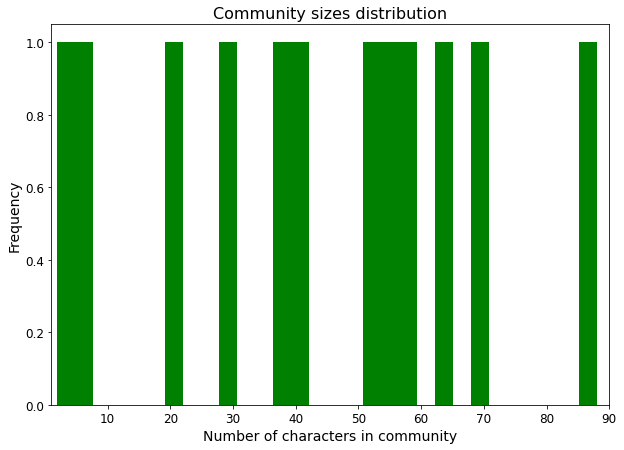

In [127]:
plt.figure(figsize = (10,7))
plt.hist(values, bins = 30, color = "green")
plt.xlabel('Number of characters in community', fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.xlim([np.min(values)-1, np.max(values)+2])
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Community sizes distribution', fontsize = 16)
plt.savefig("community_dist.png")
plt.show()

From the distribution we can see how most of the communities have a distinct number of characters. The most frequent size of a community has 60 nodes. The largest community has 78 characters and the second largest has 70 characters. It's interesting to see how different categories distribute down to the largest communities. Here below is a list of the number of different characters in the five largest communities.


Now we are going to identify which are the largest communities. 

In [128]:
# Create a sorted list from largest to smallest communities
c_sorted = sorted(l_dict.items(), key=lambda item: item[1], reverse = True)

In [129]:
# Get a list of characters for the largest communities
largest_communities = []
for i in c_sorted[0:5]: 
    c, char = i[0], i[1]
    largest_communities.append(c)

In [130]:
# Get a list of characters in all communities
all_communities = []
for i in c_sorted[0:41]: 
    c, char = i[0], i[1]
    all_communities.append(c)

In [131]:
# Get the characters for the largest communities, we save a list of them in a dictionary
char_largest_comm = {}
for i in range(len(largest_communities)):
    char_largest_comm["{0}".format(largest_communities[i])] = [k for k, v in partition.items() if v == largest_communities[i]]

In [132]:
#Get the characters for all of the communities, we save a list of them in a dictionary
char_comm = {}
for i in range(len(all_communities)):
    char_comm["{0}".format(all_communities[i])] = [k for k, v in partition.items() if v == all_communities[i]]

In [133]:
# Get characters in the top 5 largest communities and append them to a string variable for each community
c_first = char_largest_comm[str(largest_communities[0])] 
c_second = char_largest_comm[str(largest_communities[1])]
c_third = char_largest_comm[str(largest_communities[2])]
c_fourth = char_largest_comm[str(largest_communities[3])]
c_fifth = char_largest_comm[str(largest_communities[4])]

In [134]:
# Get all characters
c_all = []
for i in all_communities:
    c_all = c_all + char_comm[str(all_communities[i])]

In [135]:
# Get the distribution of categories in each of the five largest communities

# Largest
df_first = pd.DataFrame()
df_first['Name'] = c_first

for i in c_first:
    df_first['Category'] = characters.loc[characters['Name'] == i, 'Category'] = characters['Category']

print('Largest community')
print(df_first.groupby(['Category']).size())
print('')

# Second largest
df_second = pd.DataFrame()
df_second['Name'] = c_second

for i in c_second:
    df_second['Category'] = characters.loc[characters['Name'] == i, 'Category'] = characters['Category']

print('Second largest community')
print(df_second.groupby(['Category']).size())
print('')

# Third largest
df_third = pd.DataFrame()
df_third['Name'] = c_third

for i in c_third:
    df_third['Category'] = characters.loc[characters['Name'] == i, 'Category'] = characters['Category']

print('Third largest community')
print(df_third.groupby(['Category']).size())
print('')

# Fourth largest
df_fourth = pd.DataFrame()
df_fourth['Name'] = c_fourth

for i in c_fourth:
    df_fourth['Category'] = characters.loc[characters['Name'] == i, 'Category'] = characters['Category']

print('Fourth largest community')
print(df_fourth.groupby(['Category']).size())
print('')

# Fifth largest
df_fifth = pd.DataFrame()
df_fifth['Name'] = c_fifth

for i in c_fifth:
    df_fifth['Category'] = characters.loc[characters['Name'] == i, 'Category'] = characters['Category']

print('Fourth largest community')
print(df_fifth.groupby(['Category']).size())

Largest community
Category
Creature    35
Cyclope      2
God         35
Goddess     16
dtype: int64

Second largest community
Category
Creature    35
Cyclope      2
God         33
dtype: int64

Third largest community
Category
Creature    35
Cyclope      2
God         26
dtype: int64

Fourth largest community
Category
Creature    35
Cyclope      2
God         22
dtype: int64

Fourth largest community
Category
Creature    35
Cyclope      2
God         17
dtype: int64


To summarize:
- It's interesting to see how the communities distribute in sizes. Not many are of the same size, it's only the most frequent size of 60 characters, three communities are of that size. 
- It's interesting to see how different categories distribute down to the largest communities. 
- All of the five largest communities include creatures, gods and cyclope. The two largest ones include goddesses as well. But none of the biggest ones include peoples or mortals for example. That means that they don't make large communities with creatures, gods and cyclopes, which is not unusual. 

###  $\color{green}{\text{3.5 TF-IDF for communities}}$
Here we are going to calculate the TF-IDF for the communities we detected in the subsection above. To start with we combine the text for each character in each community. We want the text cleaned and all stopwords removed. Then we calculate the TF and IDF seperately and to get the TF-IDF we are simply multiplying the TF- and IDF scores. 

Step-by-step:
  - Identify which characters are in the largest communities. 
  - Then we will combine the cleaned text for all the characters in each community. The text we use here is the cleaned text created in the word cloud subsection here above. So to read about how the text was cleaned, please refer to the word cloud subsection. 
  - All the texts we save in seperate string variables for each of the five largest communities and then a variable for all communities. 
  - Then for preprocessing, we take the text variables created and remove all stopwords. We do that with using the stopword package from nltk.corpus, and we are using the english words. The reason for removing stopwords is because they are not very descriptive, this are words like: 'he', 'she', 'it', 'who', 'is', 'and', 'or', etc.. They do not provide any meaning to the text. 
  - Then the text is tokanized. With that the text is split into a list of words, so we'll be able to iterate through the text and perform analysis on it. 
  - Term frequency, TF, is simply counting how many times each word appears in a text for a community. We list up the 10 most common words for each community. 
  - Inverse document frequency, IDF, tells us how rare a word is in a text. The closer to 0 it is the more common a word is in the document. This score is calculated by getting the total number of documents and dividing it by the number of documents that contain this word. If the word appears in in many documents the score will be closer to zero, otherwise it will be closer to 1. 
  - The TF-IDF is then simply multiplying these two numbers together. The higher a score a word gets the more relevant that specific word is in that specific document. 

In [136]:
#Define a function that reads text file
def read_text_file(file_path):
    with open(os.getcwd() + file_path, 'r', encoding="utf8") as f:
        return f.read()

In [137]:
from nltk.tokenize import WordPunctTokenizer
path_exists = os.path.exists('./communities')
if path_exists == 0:
    os.mkdir('./communities')

In [145]:

# Get texts from all character pages and split them between their communities
c_all_txt = ""
c_first_txt = ""
c_second_txt = ""
c_third_txt = ""
c_fourth_txt = ""
c_fifth_txt = ""

# all communities

for char in c_all:
    try:
        
        path = f"/characters_clean/{char}.txt"

        c_all_txt = c_all_txt + ' ' + read_text_file(path)
    except FileNotFoundError:
        pass

new_path = f"./communities/c_all_txt.txt"
new_file = open(new_path, "w") 
new_file.write(c_all_txt)
new_file.close()
    
# largest community
for char in c_first:
    path = f"/characters_clean/{char}.txt"

    c_first_txt = c_first_txt + ' ' + read_text_file(path)
    
new_path = f"./communities/c_first_txt.txt"
new_file = open(new_path, "w") 
new_file.write(c_first_txt)
new_file.close()
    
# second largest community
for char in c_second:
    try:
        path = f"/characters_clean/{char}.txt"

        c_second_txt = c_second_txt + ' ' + read_text_file(path)
    except FileNotFoundError:
        pass

new_path = f"./communities/c_second_txt.txt"
new_file = open(new_path, "w") 
new_file.write(c_second_txt)
new_file.close()

# third largest community
for char in c_third:
    path = f"/characters_clean/{char}.txt"

    c_third_txt = c_third_txt + ' ' + read_text_file(path)
    
new_path = f"./communities/c_third_txt.txt"
new_file = open(new_path, "w") 
new_file.write(c_third_txt)
new_file.close()
    
# forth largest community
for char in c_fourth:
    path = f"/characters_clean/{char}.txt"

    c_fourth_txt = c_fourth_txt + ' ' + read_text_file(path)
    
new_path = f"./communities/c_fourth_txt.txt"
new_file = open(new_path, "w") 
new_file.write(c_fourth_txt)
new_file.close()
    
# fifth largest community
for char in c_fifth:
    path = f"/characters_clean/{char}.txt"

    c_fifth_txt = c_fifth_txt + ' ' + read_text_file(path)
   
new_path = f"./communities/c_fifth_txt.txt"
new_file = open(new_path, "w") 
new_file.write(c_fifth_txt)
new_file.close()

Five most frequent words according to their term frequency, TF. Here we are calculating how many times a word appears in each of the top 5 communities. 

In [146]:
# We want to remove stopwords since they are not very descriptive for the communities texts.
from nltk.corpus import stopwords

In [147]:
c_top_5 = ['c_first_txt','c_second_txt','c_third_txt','c_fourth_txt','c_fifth_txt']
text = []
tf = []
tk = WordPunctTokenizer()
cachedStopWords = stopwords.words("english")

# Read from each of the top 5 community text files
for i in c_top_5:
    txt_tokens = []
    with open(f"./communities/{i}.txt", 'r') as f: 
        txt_tokens = f.read()
        txt_tokens = txt_tokens.lower()

        # Remove stopwords
        txt_tokens = ' '.join([word for word in txt_tokens.split() if word not in cachedStopWords])
        
        # Tokanize
        txt_tokens = tk.tokenize(txt_tokens)
        
        # List up unique words
        unique_words = set(txt_tokens)
        text.append((unique_words))
        words = dict.fromkeys(unique_words, 0)
        
        for i in txt_tokens:
            words[i] += 1
        
        # Words put into a dictionary
        dict_tf = {}
        word_count = len(words)

        for word, c in words.items():
            dict_tf[word] = c / float(word_count)
        tf.append(dict_tf)
        
        # Ten most frequent words in each of the five largest communities
        print(sorted(dict_tf, key=dict_tf.get, reverse=True)[:10])

['son', 'troy', 'king', 'apollo', 'thumb', 'file', 'achilles', 'war', 'px', 'daughter']
['heracles', 'zeus', 'goddess', 'hera', 'artemis', 'god', 'demeter', 'small', 'son', 'aphrodite']
['goddess', 'mythology', 'nyx', 'also', 'stub', 'zeus', 'nike', 'god', 'hypnos', 'aether']
['poseidon', 'zeus', 'god', 'hades', 'titans', 'mother', 'sea', 'mythology', 'father', 'consort']
['son', 'theseus', 'king', 'jason', 'bull', 'minos', 'heracles', 'minotaur', 'daughter', 'file']


IDF gives us a score of how rare a word is. Here we'll calculate this for the five largest communities.

In [148]:
def get_IDF(tf,text):
    N = len(text)
    idf_dict = dict.fromkeys(set().union(*text), 0)
    
    for file in tf:
        for word, val in file.items():
            if val > 0:
                idf_dict[word] += 1
                
    for word, val in idf_dict.items():
        idf_dict[word] = math.log(N / float(val))
        
    return idf_dict

In [149]:
# This function multiplies together the TF and IDF score. Giving us how relevant a word is to a specific document. 
def get_TFIDF(tf,idf):
    tfidf = {}
    for word, score in tf.items():
        tfidf[word] = score * idf[word]
    return tfidf

In [150]:
# Text is a list of unique words in each of the five largest communities text files
idf = get_IDF(tf,text)
#idf

In [151]:
c_tfidf = []

for i in range(len(tf)):
    for j in c_top_5:
        c_tfidf.append(j)
    tfidf = get_TFIDF(tf[i],idf)

    # Print the top 10 relevant words for each community
    print(sorted(tfidf, key = tfidf.get, reverse = True)[:10])

['hector', 'priam', 'neoptolemus', 'patroclus', 'dido', 'cassandra', 'ascanius', 'chryses', 'tyndareus', 'hecuba']
['udc', 'adonis', 'hephaistos', 'amun', 'phobos', 'li', 'attis', 'pan', 'despoina', 'egyptian']
['makhai', 'nike', 'arete', 'hypnos', 'zelus', 'clotho', 'daemones', 'thanatos', 'everyone', 'androktasiai']
['hydros', 'iapetus', 'prometheus', 'allah', 'campe', 'protogenoi', 'cyclopes', 'epimetheus', 'uranus', 'hyperion']
['fleece', 'icarus', 'daedalus', 'talos', 'phaedra', 'metion', 'theseus', 'aegeus', 'minotaur', 'pasipha']


To summarize: 
- TF for the largest communities are interesting to see but it is only showing us the most frequent words in the communities. So all of the communities could have the same words as the most frequent ones. The five most frequent words for each of the five largest communities are the following:
  - Largest: 'son', 'heracles', 'king', 'father', 'theseus'
  - Second largest: 'zeus', 'poseidon', 'demeter', 'hades', 'goddess'
  - Third largest: 'son', 'king', 'jason', 'bull', 'mythology'
  - Fourth largest: 'artemis', 'goddess', 'zeus', 'mythology', 'also'
  - Fifth largest: 'son', 'troy', 'achilles', 'war', 'king'

- The term frequency is not as descriptive as TF-IDF, since it's only giving us the frequency of a word. TF-IDF is a very useful tool when extracting keywords from a text. The highest scoring words in the five largest communities are the most relevant to that specific community. TF-IDF gives us words that are most descriptive to that specific document, so for the largest communities, none of them get the same words. 
- Five of the highest scoring words in terms of TF-IDF for the largest communities are the following: 
  - Largest: 'amphitryon', 'cetus', 'atreus', 'acrisius', 'anaxagoras'
  - Second largest: 'udc', 'amun', 'hestia', 'consort', 'persephone'
  - Third largest: 'fleece', 'talos', 'ino', 'circe', 'hnir'
  - Fourth largest: 'nike', 'arete', 'dike', 'aether', 'clotho'
  - Fifth largest: 'priam', 'patroclus', 'hector', 'neoptolemus', 'ascanius'

###  $\color{green}{\text{3.6 Sentiment analysis}}$

In this section, a sentiment analysis will be performed using two different methods: labMT (language assessment by Mechanical Turk) and VADER, which was specifically for Twitter and social media analysis.

For the two cases, the following steps will be followed:
- At a character level:
    - Sentiment is calculated for each caracter (for the ones available available) and results are represented in a hisogram.
    - The happiest and saddest characters will be identified.

- At a community level: 
    - Communities are labelled in function of its three most connected characters
    - The three happiest and saddest communities are identified.
    - A bar plot will be generated to show the average sentiment of each community.

We realized that not much sentiment can be extracted from the Fandom page, so we went out on the Internet to find an extra source that would provide us with more information about the characters. 

We found [Theoi](https://www.theoi.com/), an encyclopedia-like free reference guide for greek mythology. An example of one of its pages can be found [here](https://www.theoi.com/Olympios/Zeus.html). All (or most) pages contain a section called *CLASSICAL LITERATURE QUOTES*, which provide a more "sentimental" description than the wiki entries.

In [152]:
#Character text extraction

url = "https://www.theoi.com/greek-mythology/encyclopedia-a.html"

html = requests.get(url)
reqs = requests.get(url)
soup = BeautifulSoup(reqs.text, 'html.parser')
urls = []
for link in soup.find_all('a'):
    urls.append(link.get('href')) 
    
urls.sort()
urls = [url for url in urls if len(url) > 3 and url[0]=='.'] # only get the ones that are urls to characters
urls[:5] #example of how urls look

['../Bibliography.html',
 '../Daimon/Adephagia.html',
 '../Daimon/Adikia.html',
 '../Daimon/Aergia.html',
 '../Daimon/Agon.html']

In [153]:
json_quotes = {} # will contain each quote, per character

# Some urls contain the type of being the charater is. For example 'HipposPegasos'.
# We need to remove those so that the extracted name matches the name in the characters folder
def correct_match(match):
    # match: regex search result
    list_corrections = ['Titanis','Titan','Gigants','Gigante','Nymphai','Nymphe','Potamos',' Hippos']
    if len(match)>0:
        for c in list_corrections:
            match[-1] = match[-1].replace(c,"");
    return match

# Check if an extracted name from the encyclopedia is found in the characters folder
def is_character(url_entry, match, latin_name):
    # url entry:
    # match: 
    # latin_name:
    if len(match) < 1:
        match = latin_name
    done = False
    name_index = 0
    while name_index < len(latin_name) and done == False: # latin_name could be a list
        name = latin_name[name_index]
        if os.path.isfile('./characters/' + name + '.txt'):
            # print (match[-1] + ' (latin: ' + name + ')' +' is a file')
            done = True
        else:
            # print (url_entry + ' (latin: ' + name + ')' + ' is not a file')
            done = False
        name_index += 1 
    
    return done

def get_quotes(url_entry):
     # all extracted urlss start with '..', so we dont have them into account in url_entry
    url = "https://www.theoi.com" + url_entry[2:]
    html_resp = requests.get(url) # get html response with raw text
    html_text = re.sub('\n', '',html_resp.content.decode('utf-8')) #delete carriage returns
    # The characters folder contain the characters¡ names in their Latin spelling. That means that 
    # while Theoi will return 'Pegasus', we will need to retrieve the word 'Pegasus' (Latin) to find 
    # a match in the characters folder.
    latin_name = re.findall(r'<h5>Latin Spelling</h5><p>(.*?)</p>', html_text)
    if latin_name:
        latin_name = latin_name[0]
    else:
        latin_name = ['']
    pattern = '.*?\/(\w+)' #return letters that come after a slash 
    match = re.findall(pattern, url_entry)
    match = correct_match(match)

    if len(match)>0:
        if latin_name == ['']:
            latin_name = match[-1]
            
    #More than one Lating spelling could be provided, and they can be separated either by a comma
    # or by a line break. We take care of that in the following block:
    latin_name_split = latin_name.split(', ') 
    if len(latin_name_split) == 1:
        latin_name_split = latin_name.split('<br>')

    # If this character is in the characters folder, extract its dialogues
    if is_character(url_entry, match, latin_name_split):
        quotes = re.search(r'<h2>CLASSICAL LITERATURE QUOTES(.*?)<hr>', html_text)
        if quotes is None:
            pass
        else:
            quotes = quotes[0]
            quotes_clean = re.sub('<.*?>', '', quotes)
            quotes_list = re.findall('\&quot\;(.*?)\.&quot', quotes_clean)
            quotes_dict = {} #all the dialogues for the character in question
            for i, q in enumerate(quotes_list):
                quotes_dict[i] = q
            json_quotes[latin_name] = quotes_dict #update the per-character list of quotes

    else:
        return False


In [163]:
for url in urls: # get dialogues from the characters in the encyclopedia that are in the characters folder
    quote = get_quotes(url)
    
with open('dialogue.json', 'w') as f:
    json.dump(json_quotes, f)

json_quotes_sorted = dict(sorted(json_quotes.items()))
with open('dialogue_sorted.json', 'w') as f:
    json.dump(json_quotes_sorted, f)

$\color{green}{\text{At a character level: LabMT}}$

##### $\color{green}{\text{LabMT}}$

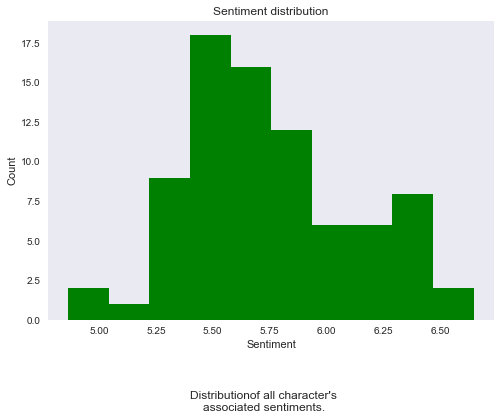

In [164]:
f = open('dialogue_sorted.json',)
dialogues = json.load(f) # returns JSON object as a dictionary

#tokenize  text
def tokenize_text(text, remove_wikisyntax=False):
    # sets text to lower case, removes punctuation and stopwords and lemmatizes before tokenizing
    if remove_wikisyntax:
        text = re.sub(r'\{\{.*?\}\}', '', text)
        text = re.sub(r'\[\[.*?\]\]', '', text)
        text = re.sub(r'\<.*?\>', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    tokens = set(tokens)
    tokens = [token for token in tokens if token not in stopwords.words('english')]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

# Get LabMT wordlist
sentiment_url = 'https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0026752.s001&type=supplementary'
sentiment_values = pd.read_csv(sentiment_url, skiprows=3, delimiter='\t')[['word', 'happiness_average']]

from nltk.corpus import stopwords #DO NOT REMOVE

#Calculate the characters sentiment of a (undirected) network using LabTM
def sentiments_labmt(G):
    for character in G.nodes():
        try:
            page_content = repr(dialogues[character])
        except FileNotFoundError:
            continue
        except KeyError:
            continue
        quotes = tokenize_text(page_content)
        sent = pd.DataFrame.from_dict(quotes)
        sent.columns = ['word']
        sent['count'] = sent.groupby('word')['word'].transform('count')
        sent = sent.merge(sentiment_values, on=['word'])
        if sent.empty:
            continue
        sent['mean'] = (sent['happiness_average'] * sent['count']).sum() / \
                            sent['count'].sum()
        G.nodes[character]['sentiment'] = sent['mean'].mean()
    pickle.dump(G, io.open('greek_sentiment_graph_labmt.p', 'wb'))
    return G
 
def plot_labmt(G):
    sents = nx.get_node_attributes(G, 'sentiment')
    title = "Sentiment distribution"
    caption = "Distributionof all character's\nassociated sentiments."
    values, bins = np.histogram([value for value in sents.values() if value is not np.nan],
                                10)
    plt.style.use("seaborn")
    plt.bar(bins[:-1], values, width=0.18, color = "green")
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.grid()
    plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()

greek_graph_labmt = sentiments_labmt(G_undir)
plot_labmt(G_undir)

In [165]:
sents_labmt = pd.DataFrame.from_dict(dict(G_undir.nodes(data=True)), orient='index')
sents_labmt = sents_labmt.dropna(subset=['sentiment'])
print()
print('Happiest characters:')
display(list(sents_labmt.sort_values(by='sentiment', ascending=False).head(10).index))
print()
print('Saddest characters:')
display(list(sents_labmt.sort_values(by='sentiment', ascending=True).head(10).index))


Happiest characters:


['Helios',
 'Selene',
 'Aegle',
 'Leto',
 'Persephone',
 'Asteria',
 'Eos',
 'Aceso',
 'Ariadne',
 'Atlas']


Saddest characters:


['Eris',
 'Hypnos',
 'Ares',
 'Sphinx',
 'Cerberus',
 'Charybdis',
 'Penthesilea',
 'Ate',
 'Achlys',
 'Aetna']

$\color{green}{\text{VADER}}$

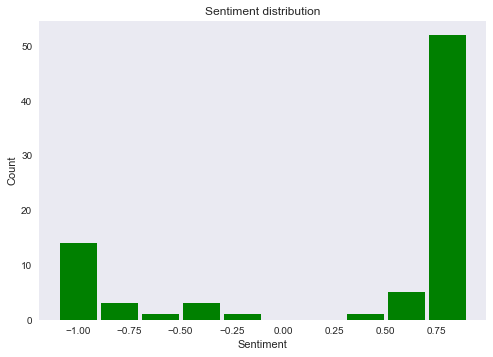

In [166]:
SIA = SentimentIntensityAnalyzer()

#Calculate the characters sentiment of a (undirected) network using LabTM
def sentiments_vader(G):
    for character in G.nodes():
        try:
            page_content = repr(dialogues[character])
        except FileNotFoundError:
            continue
        except KeyError:
            continue
        SIA = SentimentIntensityAnalyzer()
        sentiment_dict = SIA.polarity_scores(page_content).get("compound")
        G.nodes[character]['sentiment'] = sentiment_dict
    pickle.dump(G, io.open('greek_sentiment_graph_vader.p', 'wb'))
    return G

def plot_vader(G):
    sentiments = nx.get_node_attributes(G, 'sentiment')
    title = "Sentiment distribution"
    values, bins = np.histogram([value for value in sentiments.values() if value is not np.nan], 10)
    plt.bar(bins[:-1], values, width=0.18, color = "green")
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.grid()
    plt.show()
greek_graph_vader = sentiments_vader(G_undir)
plot_vader(G_undir)

In [167]:
sents_vader = pd.DataFrame.from_dict(dict(greek_graph_vader.nodes(data=True)), orient='index')
sents_vader = sents_vader.dropna(subset=['sentiment'])

print()
print('Happiest')
display(sents_vader.sort_values(by='sentiment', ascending=False).head(10))
print()
print('Saddest')
display(sents_vader.sort_values(by='sentiment', ascending=True).head(10))


Happiest


,Category,Species,sentiment
Psyche,Personification,[daemon],1.0000
Arete,Personification,NaN,0.9999
Artemis,Goddess,[Goddess],0.9998
Pygmalion,Mortal,NaN,0.9997
Leda,Mortal,NaN,0.9997
Hermes,God,[God],0.9995
Apollo,God,[God],0.9995
Demeter,Goddess,[Goddess],0.9992
Phoenix,Creature,NaN,0.9992
Aphrodite,Goddess,[Goddess],0.9989



Saddest


,Category,Species,sentiment
Cerberus,Creature,[Hellhound],-0.9999
Phaethon,Mortal,NaN,-0.9995
Sphinx,Creature,NaN,-0.9994
Ate,Stub,NaN,-0.9982
Penthesilea,Heroe,NaN,-0.9975
Charybdis,Creature,NaN,-0.9960
Dionysus,God,"[God, Demigod]",-0.9942
Hypnos,God,NaN,-0.9845
Eris,Goddess,NaN,-0.9802
Pelops,Mortal,NaN,-0.9716


#### $\color{green}{\text{At a community level}}$

In [168]:
# Compute communities
louvian_part = community_louvain.best_partition(G_undir, randomize=False)

# Return a dictionary with communities as keys and character names as values
def reverse_dictionary(louvian_part: dict) -> dict:
    reverse_d = defaultdict(list)
    for k, v in louvian_part.items():
        reverse_d[v].append(k)
    return reverse_d

louvian_part = reverse_dictionary(louvian_part)

degree_sorted = sorted(G_undir.degree, key=lambda x: x[1], reverse=True)

# Get the 3-names name of a community
def get_name(community_no):
    d = {}
    for character in louvian_part[community_no]:
        for elem in degree_sorted:
            if elem[0] == character:
                d[character] = elem[1]

    names_top3 = (sorted(d.items(), key = lambda x: x[1], reverse = True)[:3]) #highest degrees
    community_name = names_top3[0][0] + " - " + names_top3[1][0] +  " - " + names_top3[2][0]
    return community_name

##### $\color{green}{\text{LabMT}}$

In [169]:
#create a dictionary with each character and their community, so the communities can be added to the sentiment dataframe
commList = {}
for comm,char in louvian_part.items():
    for character in char:
        commList[character] = comm
        
# extending the dataframe by adding the community of each character
sents_labmt["character"] = sents_labmt.index
sents_labmt["community"] = sents_labmt["character"].map(commList)
sents_labmt.reset_index(drop=True, inplace=True)

#grouping the communities and calculate the average sentiment
sents_labmt_avg = sents_labmt.groupby('community').mean()

#sorting the communities from high to low sentiment values
sents_labmt_avg.sort_values(by=['sentiment'], ascending=False)

#print("These are the following communities:", get_name(13), ";", get_name(0), ";", get_name(4))
happiest_comm_3 = list(sents_labmt_avg.sort_values(by=['sentiment'], ascending=False).index[:3])
saddest_comm_3 = list(sents_labmt_avg.sort_values(by=['sentiment'], ascending=False).index[-3:])
print("These are the happiest communities:", get_name(happiest_comm_3[0]), ";", get_name(happiest_comm_3[1]), ";", get_name(happiest_comm_3[2]))

print("These are the saddest communities:",  get_name(saddest_comm_3[0]), ";", get_name(saddest_comm_3[1]), ";", get_name(saddest_comm_3[2]))

These are the happiest communities: Asclepius - Epione - Aegle ; Atlas - Maia - Pleiades ; Helios - Horae - Eos
These are the saddest communities: Daemon - Eris - Nyx ; Athena - Perseus - Scylla ; Cadmus - Argives - Greco-Roman river deities


##### $\color{green}{\text{VADER}}$

In [170]:
#extending the dataframe by adding the community of each character
sents_vader["character"] = sents_vader.index
sents_vader["community"] = sents_vader["character"].map(commList)
sents_vader.reset_index(drop=True, inplace=True)

#grouping the communities and calculate the average sentiment
sents_vader_avg = sents_vader.groupby('community').mean()

#sorting the communities from high to low sentiment values
sents_vader_avg.sort_values(by=['sentiment'], ascending=False)

happiest_comm_3 = list(sents_vader_avg.sort_values(by=['sentiment'], ascending=False).index[:3])
print("These are the happiest communities:", get_name(happiest_comm_3[0]), ";", get_name(happiest_comm_3[1]), ";", get_name(happiest_comm_3[2]))
saddest_comm_3 = list(sents_vader_avg.sort_values(by=['sentiment'], ascending=False).index[-3:])
print("These are the saddest communities:",  get_name(saddest_comm_3[0]), ";", get_name(saddest_comm_3[1]), ";", get_name(saddest_comm_3[2]))

These are the happiest communities: Zeus - Muses - Charites ; Cadmus - Argives - Greco-Roman river deities ; Atlas - Maia - Pleiades
These are the saddest communities: Minos - Theseus - Atreus ; Daemon - Eris - Nyx ; Athena - Perseus - Scylla


##### $\color{green}{\text{LabMT bar plot}}$

In [171]:
std_labmt = sents_labmt.groupby('community').std()
std_vader = sents_vader.groupby('community').std()

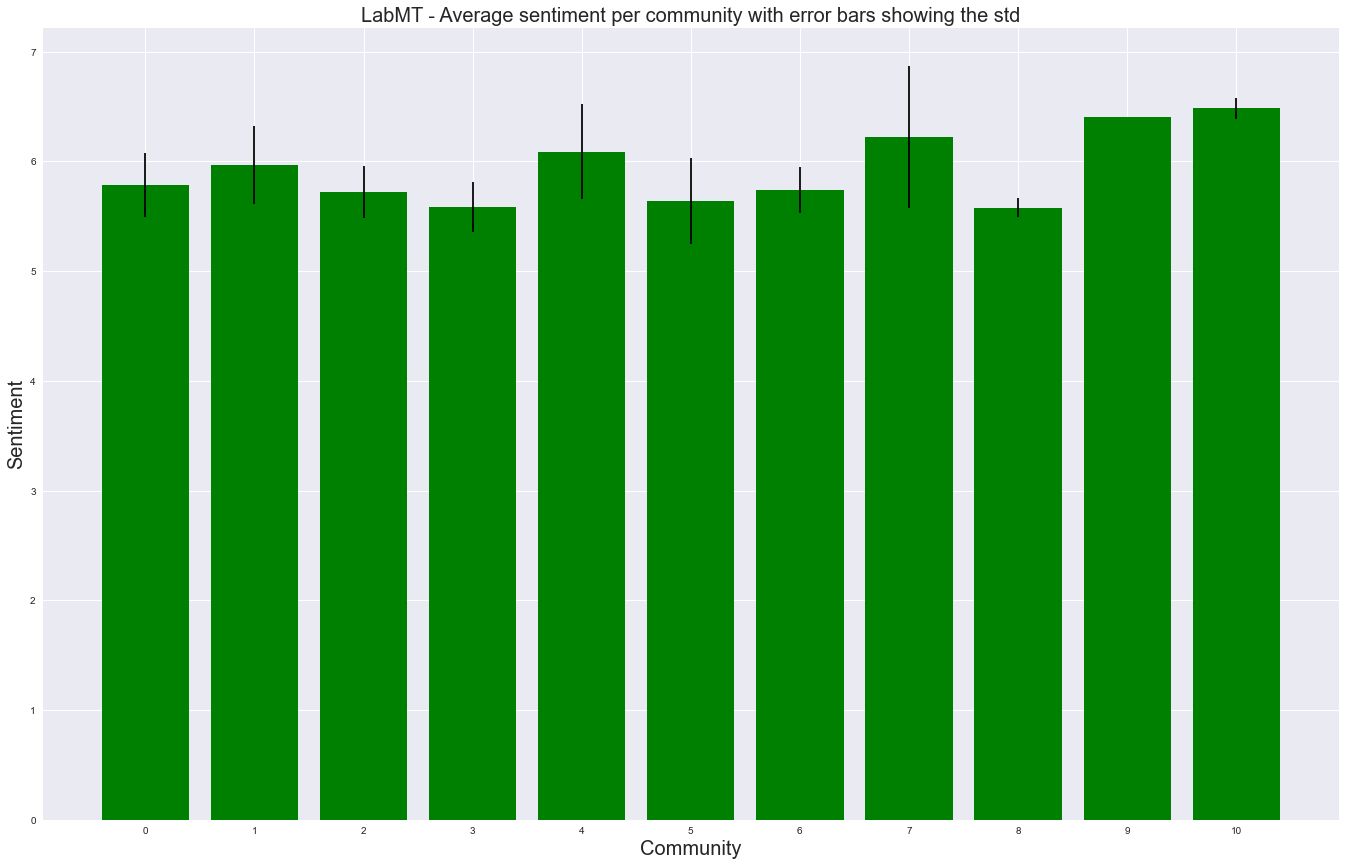

In [172]:
fig = plt.figure(figsize=(9, 11))
ax = fig.add_axes([0,0,2,1])
x = sents_labmt_avg.index
y = sents_labmt_avg["sentiment"]
ax.bar(x,y, color = 'green')               
er = errorbar(x,y,std_labmt.sentiment, fmt="none", ecolor="black", capsize=5)
ax.set_xlabel("Community", fontsize = 20)
ax.set_ylabel("Sentiment", fontsize = 20)
ax.set_title("LabMT - Average sentiment per community with error bars showing the std", fontsize = 20)
ax.set_xticks(x)
plt.savefig('labmt_average_with_error_bars.png', bbox_inches = 'tight')
plt.show()


##### $\color{green}{\text{Vader Bar plot}}$

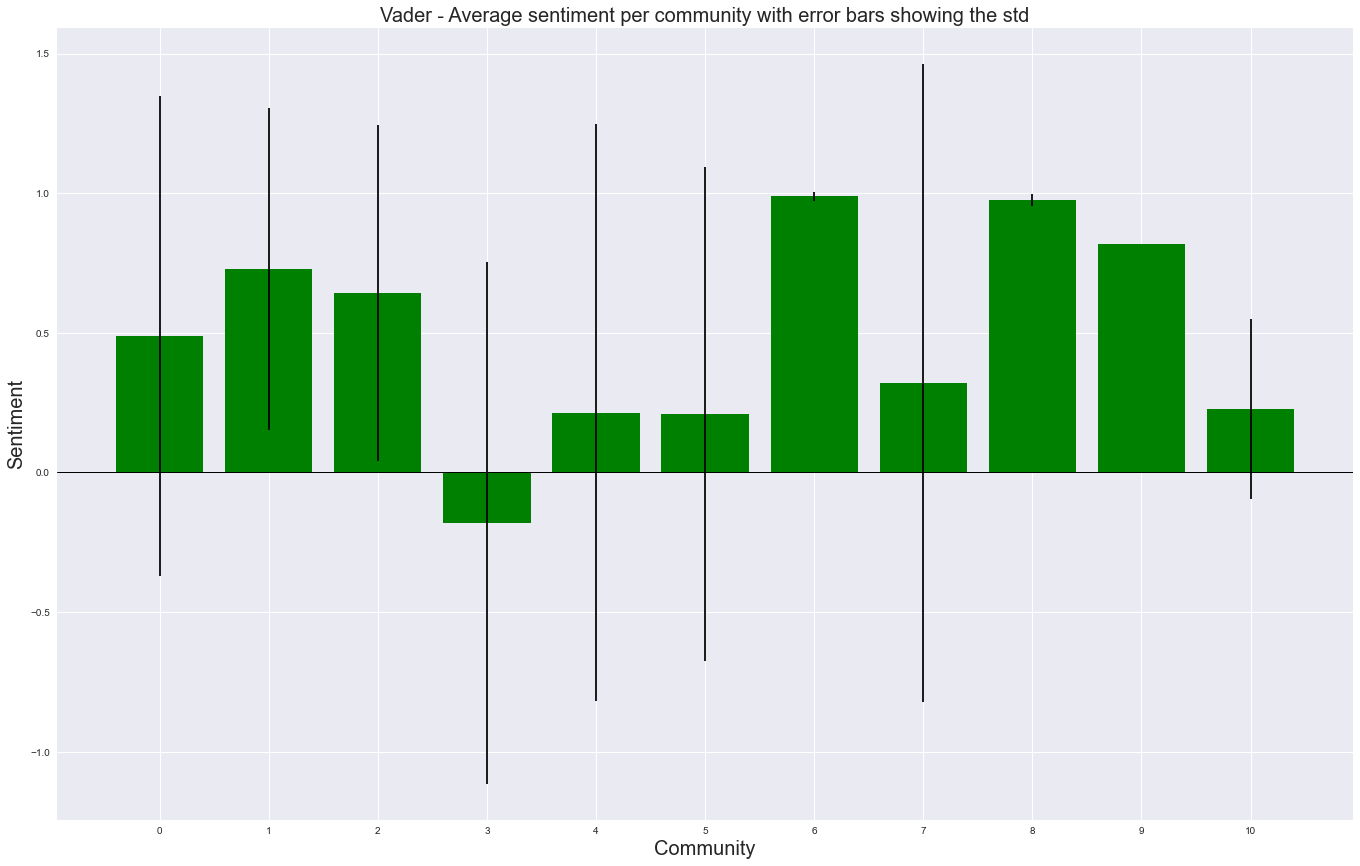

In [173]:
fig = plt.figure(figsize=(9, 11))
ax = fig.add_axes([0,0,2,1])
x = sents_vader_avg.index
y = sents_vader_avg["sentiment"]
ax.bar(x,y, color='green')               
er = errorbar(x,y,std_vader.sentiment, fmt="none", ecolor="black", capsize=5);
ax.set_xlabel("Community", fontsize = 20)
ax.set_ylabel("Sentiment", fontsize =20)
ax.set_title("Vader - Average sentiment per community with error bars showing the std", fontsize = 20)
ax.set_xticks(x)
plt.axhline(y=0,linewidth=1, color='black')
plt.savefig('vader_average_with_error_bars.png', bbox_inches = 'tight')
plt.show()


**What is the advantage of using a rule-based method over the dictionary-based approach?**
 
The rule-based method does not only rely on the analysis with words provided in the library of the dictionary-based approach. The advantage of this is that the rule-based method can change the polarity of the sentiments. The rules in the method can be that capital letters intensifies the sentiment. Other examples are usage of exclamation marks, the words "but","or" and "if". The rule-based method gives a score for how positive or negative a word is addtionally to tell how much positive or negative it is. The dictionary-based approach(labMT) is only based on a list of 5000 words. If a word is not in the text the text is more positive/negative depending on what word is missing. This means that the dictionary-based approach only look at one word at a time instead of sentences as in the rule-based method. 

**What is the result of the rule-based and dictionary-based approaches?**

In the LabMt plot the average sentiments lays between 5 to 7 for the different communities. The variation is not that wide which leads to a smaller standard devation, as showed as error bars, compared to the ones in the Vader plot. 
As seen in the Vader plot the range in average sentiments are broad. This is because the different sentiments for the different communitites and characters vary. This leads to greater standard deviations, hence the long error bars. 

The conclusion of this is that the dictionary-based method makes the communities more positive compared to the rule-based method that overall has lesser positivity in the different communities.



**The happiest communities for LabMT are:**
Atlas - Maia - Pleiades ; Apollo - Helios - Horae ; Poseidon - Gaia - Aphrodite

**The happiest communities for Vader are :**
Thetis - Peleus - Amphitrite ; Atlas - Maia - Pleiades ; Poseidon - Gaia - Aphrodite

**The saddest communities for LabMT are:**
Athena - Scylla - Medusa ; Muses - Hercules (1997 film) - Adonis ; Troy - Ares - Agamemnon

**The saddest communities for Vader are:**
Troy - Ares - Agamemnon ; Athena - Scylla - Medusa ; Muses - Hercules (1997 film) - Adonis

The above happiest communities shows that the happiest community for LabMT is actually the second happiest community of Vader. The third happiest community are equal for the two analysis methods. Both approaches have the same three communities as the saddest one but not in the same order.  

Helios is the god of sun, Poseidon is the god of water, Aphrodite is the goddess of love and Gaia is the god of earth. These themes are often thought of as calm and positive. 

Medusa is a monster, Heracles is god of sports and Troy is a city which is known for the big Trojan war. Not surprisingly, these characters are among the saddest communities. 



## $\color{green}{\text{4. Discussion}}$


###  $\color{green}{\text{4.1 What went well?}}$
- The extraction of web sites, cleaning the text files, making the communities all went well. 
- Making the website was demanding but after all three project members contributed it finally suceeded


###  $\color{green}{\text{4.2 What is still missing?}}$
- Due to the small dataset from Fandom there was a need for additional texts to compare. However, if was found that the intersection between the two datasets was still small, and this results int the sentiment analysis not having a high confidence.

###  $\color{green}{\text{4.3 What could be improved?}}$
- It can be discussed if the text cleaning should have gods names in it. It was concluded that the texts would make more sense without the characters names without them so all text files, which would be the different characters names, were removed from all text files. This leads to WordClouds without characters name which could be misleading due to the fact that for example the godess Hera mentions her brother Zeus a lot. 
- In the distribution for the in- and out edges we found that in one of them was in the scale free regime and the other was in the random regime. For the latter this means that it should be any hubs in it. However, we saw that Zeus was still a hub so that would need to be reviewed. 
- We struggeled to make a decent ForceAtlas2 even though we tried a lot of different inputs but could not find the right combination. 

## $\color{green}{\text{5. Contributions}}$

All members have spent approximately the same amount of time working on the project. Several physical and online meetings took place where updating on and reviewing each other’s work took place. The initial steps such as choosing the subject (wiki and text/dialogues source), creating the introduction video as done together.

Even though all members have worked collaboratively and helped each other in their assigned tasks, the main contributions of each teammate are listed below:
- Ana - Web scrapping/data processing (Section 2), sentiment analysis (section 3.6) and explainer notebook
- Iris - Communities (section 3.4), TF-IDF (section 3.6), webpage and explainer notebook
- Ruth - Word clouds (section 3.3), explainer notebook and webpage.
